# Tensorflow Classification Model

#### Best Params

Model Architecture -   
Dense(48, activation='relu', input_shape=(10,))  
Dense(48, activation='relu'),  
Dense(1, activation='sigmoid')  

Paramters -   
optimizer=Adam(0.01)   
loss='binary_crossentropy'  
epochs=100   
batch_size=128 
validation_split=0.2  

Accuracy - 74.13%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv('datasets/magic04.data', 
                   names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'])

data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
data['class'] = (data['class'] == 'g').astype(int)
data['class'].unique()

array([1, 0])

##### Feature/Label split

In [4]:
X = data.drop('class', axis=1)
y = data['class']

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Simple Model training

In [7]:
model = tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

##### Accuracy Plot

In [9]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

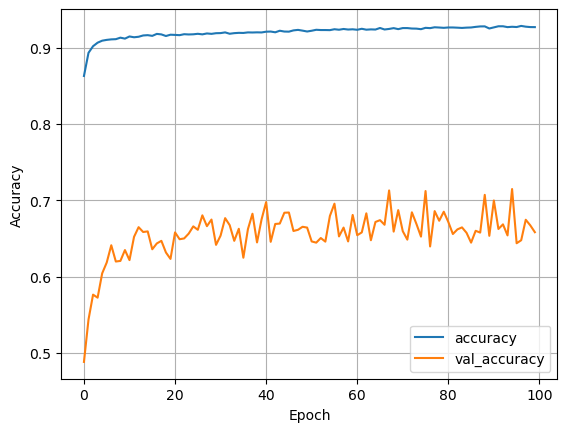

In [10]:
plot_accuracy(history)

In [11]:
max(history.history['val_accuracy'])

0.7147738933563232

##### Model with Dropout Layers

In [12]:
model = tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

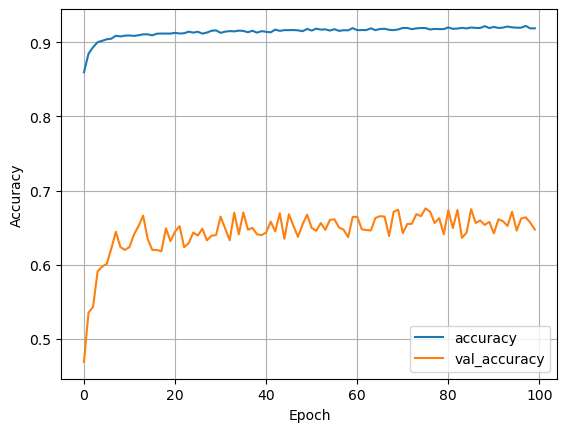

In [14]:
plot_accuracy(history)

In [15]:
max(history.history['val_accuracy'])

0.6761304140090942

##### Hyperparamter tuning

In [21]:
best_acc = -1
for layersize in [32, 48, 64]:
    for batch in [32, 64, 128]:
        for learning_rate in [0.01, 0.005, 0.001]:
            
            model = tf.keras.Sequential([
                Dense(layersize, activation='relu', input_shape=(10,)),
                Dense(layersize, activation='relu'),
                Dense(1, activation='sigmoid')
            ])

            model.compile(optimizer=Adam(learning_rate), 
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

            history = model.fit(X, y, epochs=100, batch_size=batch, validation_split=0.2, verbose=0)
            val_acc = max(history.history['val_accuracy'])
            model_info = (f'Accuracy {round(val_acc, 5)} LayerSize {layersize} BatchSize {batch} LR {learning_rate}')
            print(model_info)

            if val_acc > best_acc:
                   best_acc = val_acc
                   best_model = model_info
                              
print(f'\n\n\n {best_model}')

Accuracy 0.70189 LayerSize 32 BatchSize 32 LR 0.01
Accuracy 0.70952 LayerSize 32 BatchSize 32 LR 0.005
Accuracy 0.71346 LayerSize 32 BatchSize 32 LR 0.001
Accuracy 0.70768 LayerSize 32 BatchSize 64 LR 0.01
Accuracy 0.7153 LayerSize 32 BatchSize 64 LR 0.005
Accuracy 0.70216 LayerSize 32 BatchSize 64 LR 0.001
Accuracy 0.71504 LayerSize 32 BatchSize 128 LR 0.01
Accuracy 0.73186 LayerSize 32 BatchSize 128 LR 0.005
Accuracy 0.71004 LayerSize 32 BatchSize 128 LR 0.001
Accuracy 0.7224 LayerSize 48 BatchSize 32 LR 0.01
Accuracy 0.72292 LayerSize 48 BatchSize 32 LR 0.005
Accuracy 0.71924 LayerSize 48 BatchSize 32 LR 0.001
Accuracy 0.71714 LayerSize 48 BatchSize 64 LR 0.01
Accuracy 0.72871 LayerSize 48 BatchSize 64 LR 0.005
Accuracy 0.70452 LayerSize 48 BatchSize 64 LR 0.001
Accuracy 0.74132 LayerSize 48 BatchSize 128 LR 0.01
Accuracy 0.71977 LayerSize 48 BatchSize 128 LR 0.005
Accuracy 0.69243 LayerSize 48 BatchSize 128 LR 0.001
Accuracy 0.69821 LayerSize 64 BatchSize 32 LR 0.01
Accuracy 0.7310